In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, data, filters, img_as_float, img_as_ubyte
from skimage.color import rgb2gray, gray2rgb
from skimage.filters.rank import mean, median, maximum, minimum
from skimage.morphology import cube, ball, square, disk, diamond, rectangle
from skimage.restoration import (denoise_tv_chambolle,  denoise_bilateral, 
                                 denoise_wavelet)
from skimage.exposure import adjust_gamma
from scipy.signal import convolve2d

# A. Multiple Choices

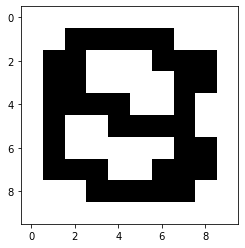

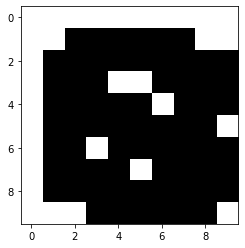

True

In [46]:
img = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
               [1, 1, 0, 0, 0, 0, 0, 1, 1, 1],
               [1, 0, 0, 1, 1, 1, 0, 0, 0, 1],
               [1, 0, 0, 1, 1, 1, 1, 0, 0, 1],
               [1, 0, 0, 0, 0, 1, 1, 0, 1, 1],
               [1, 0, 1, 1, 0, 0, 0, 0, 1, 1],
               [1, 0, 1, 1, 1, 1, 1, 0, 0, 1],
               [1, 0, 0, 0, 1, 1, 0, 0, 0, 1],
               [1, 1, 1, 0, 0, 0, 0, 0, 1, 1],
               [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]], dtype='uint8')

kernel = np.array([
    [1, 1, 0],
    [1, 1, 0],
    [0, 0, 0]
], dtype='uint8')

eroded_img = cv2.erode(img, kernel=kernel)

plt.imshow(img, cmap='gray')
plt.show()
cv2.imwrite('Lab08_A_before.jpg', img*255)

plt.imshow(eroded_img, cmap='gray')
plt.show()
cv2.imwrite('Lab08_A_after.jpg', img*255)

# B. Find the Counter

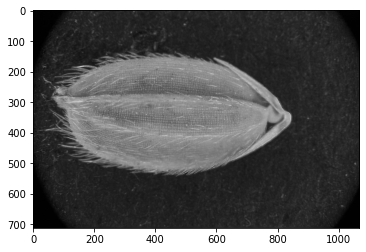

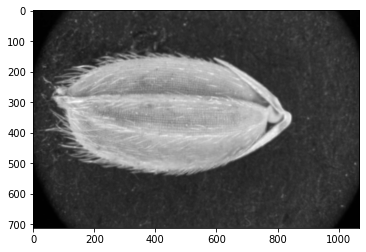

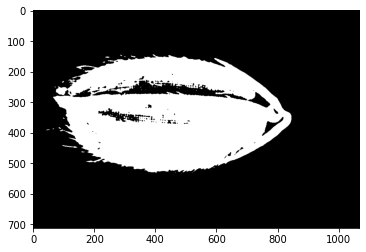

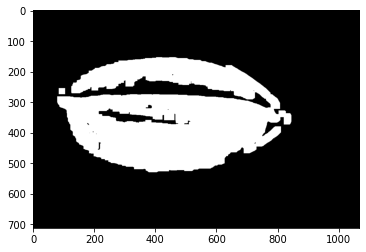

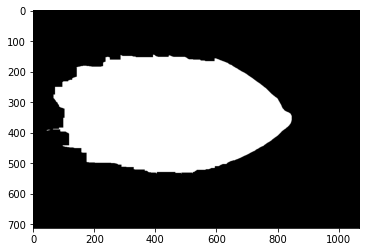

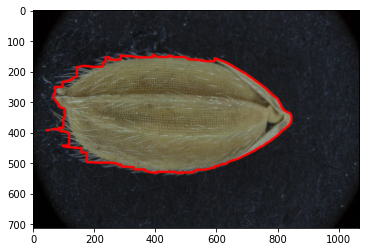

In [43]:
img = cv2.imread("./SingleRice.jpg")
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

plt.imshow(img_gray, cmap='gray')
plt.show()

img_blurred = cv2.GaussianBlur(img_gray, (9, 9), 0)
plt.imshow(img_blurred, cmap='gray')
plt.show()

ret, img_bin = cv2.threshold(img_blurred, 90, 140, cv2.THRESH_BINARY)
plt.imshow(img_bin, cmap='gray')
plt.show()

kernel = np.ones((20,20), np.uint8)
opening = cv2.morphologyEx(img_bin, cv2.MORPH_OPEN, kernel)
plt.imshow(opening, cmap='gray')
plt.show()

kernel = np.ones((30,30), np.uint8)
closing = cv2.morphologyEx(img_bin, cv2.MORPH_CLOSE, kernel)
plt.imshow(closing, cmap='gray')
plt.show()

contours, hierarchy = cv2.findContours(image=closing, mode=cv2.RETR_TREE, method=cv2.CHAIN_APPROX_NONE)

image_copy = img_rgb.copy()
cv2.drawContours(image=image_copy, contours=contours, contourIdx=-1, color=(255, 0, 0), thickness=5, lineType=cv2.LINE_AA)

plt.imshow(image_copy)
plt.show()

plt.imsave('Lab08_B.jpg', image_copy, dpi=400)

# C. Image Enhancement

In [3]:
xray = io.imread('./Xray.png')
xray = img_as_float(xray)
print(xray.shape, xray.dtype)

# (a) Apply Laplacian filter to the original image
xray_a = img_as_float(filters.laplace(xray))

# (b) Subtract image from (a) from the original image to obtain a smoothed image
xray_b = img_as_float(xray - xray_a)

# (c) Apply both the horizontal and vertical Sobel filter to the image from (b)
xray_c = img_as_float(filters.sobel(xray_b))

# (d) Smooth image from (c) using a 5×5 averaging filter
xray_d = img_as_float(filters.rank.mean(xray_c, square(5)))

# (e) Element-by-element multiply the images from (b) and (d)
xray_e = img_as_float(xray_b * xray_d)

# (f) Add the image from (e) to the original image to obtain a sharpened image
xray_f = img_as_float(xray + xray_e)

# (g) Apply power-law transformation (i.e., g𝑜 = (g𝑖)0.5) to adjust the image contrast
xray_g = adjust_gamma(xray_f, gamma=0.5)

(411, 257) float64


c:\users\88697\appdata\local\programs\python\python39\lib\site-packages\IPython\core\interactiveshell.py:3441: UserWarning: Possible precision loss converting image of type float64 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  exec(code_obj, self.user_global_ns, self.user_ns)


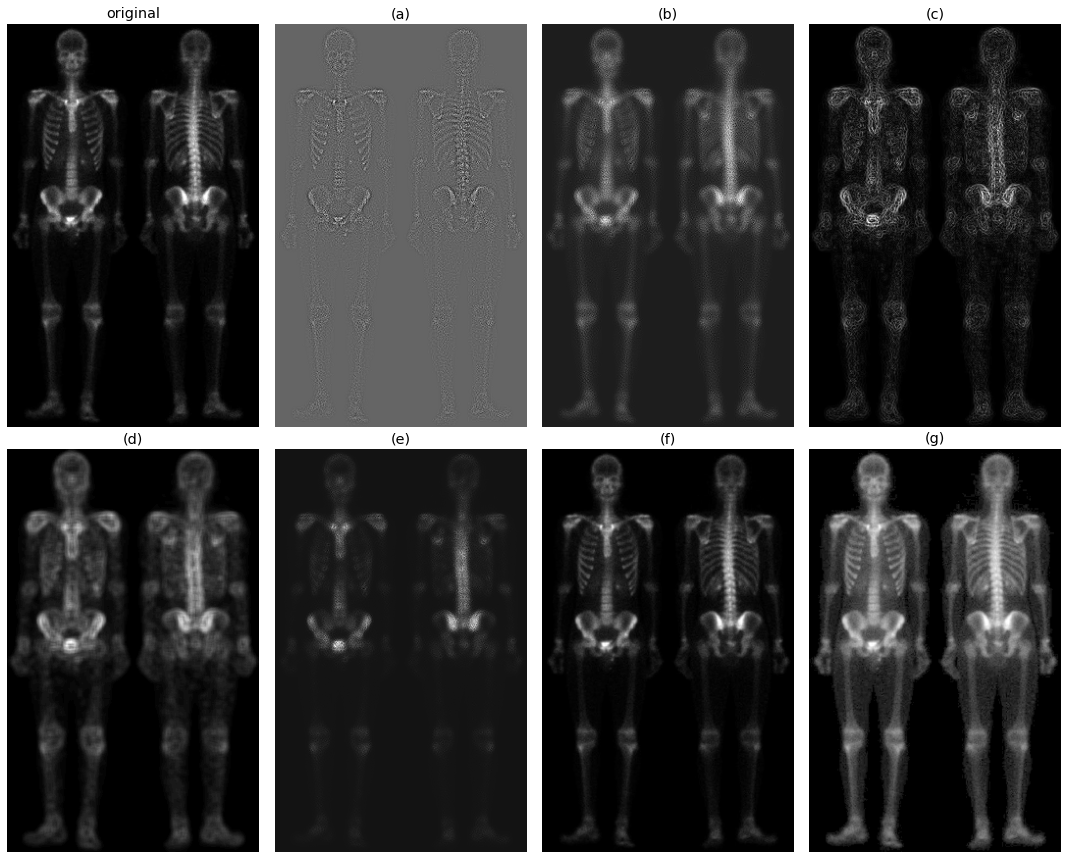

In [5]:
xrays = [xray, xray_a, xray_b, xray_c, 
         xray_d, xray_e, xray_f, xray_g]
titles = ['original', '(a)', '(b)', '(c)', 
          '(d)', '(e)', '(f)', '(g)']

fig, axes = plt.subplots(2, 4, figsize=(15, 12))
ax = axes.ravel()

for i in range(8):
    ax[i].imshow(xrays[i], cmap='gray')
    ax[i].set_title(titles[i], fontsize='x-large')
    ax[i].axis('off')
    
plt.tight_layout()
plt.show()

# D. Fingerprint Analysis

In [7]:
fp = io.imread('./Fingerprint.tif')
fp = img_as_float(fp)
print(fp.shape, fp.dtype)

(480, 400) float64


In [9]:
import skimage.morphology as morph
import fingerprint_enhancer
import scipy

# convert grayscale image to binary
thresh_sauvola = filters.threshold_sauvola(fp, window_size=25, 
                                           k=0.15, r=0.3)
fp_bin = fp > thresh_sauvola
fp_bin = True^fp_bin

# filling holes, removing small objects
fp_1 = morph.remove_small_objects(fp_bin, 35)
fp_2 = morph.remove_small_holes(fp_1)
fp_3 = morph.binary_opening(fp_2, square(1))
fp_4 = morph.binary_closing(fp_3, square(1))
fp_5 = morph.skeletonize(fp_4)

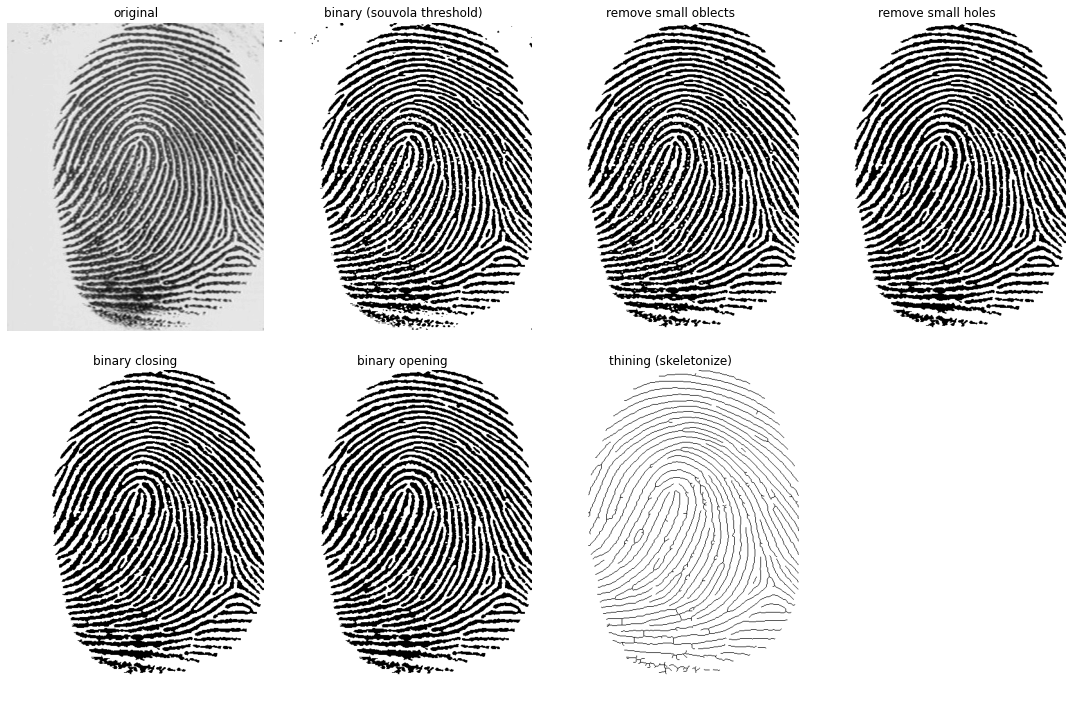

In [11]:
plt.rcParams['image.cmap']= 'gray'

fig, axes = plt.subplots(2, 4, figsize=(15, 10))
ax = axes.ravel()

for i in ax:
    i.axis('off')

ax[0].imshow(fp)
ax[0].set_title('original')
ax[1].imshow(True^fp_bin)
ax[1].set_title('binary (souvola threshold)')
ax[2].imshow(True^fp_1)
ax[2].set_title('remove small oblects')
ax[3].imshow(True^fp_2)
ax[3].set_title('remove small holes')
ax[4].imshow(True^fp_3)
ax[4].set_title('binary closing')
ax[5].imshow(True^fp_4)
ax[5].set_title('binary opening')
ax[6].imshow(True^fp_5)
ax[6].set_title('thining (skeletonize)')

plt.tight_layout()
plt.savefig('fingerprint_preprocessed')
plt.show()

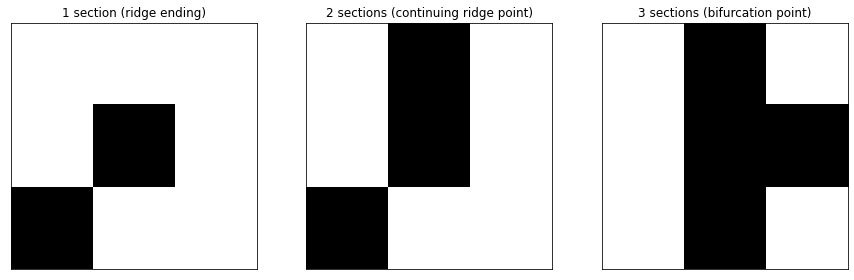

In [12]:
plt.figure(figsize=(15, 5))
plt.subplot(131)
plt.imshow(True^fp_5[189:192, 197:200])
plt.xticks(ticks=[])
plt.yticks(ticks=[])
plt.title('1 section (ridge ending)')
plt.subplot(132)
plt.imshow(True^fp_5[191:194, 196:199])
plt.xticks(ticks=[])
plt.yticks(ticks=[])
plt.title('2 sections (continuing ridge point)')
plt.subplot(133)
plt.imshow(True^fp_5[180:183, 175:178])
plt.xticks(ticks=[])
plt.yticks(ticks=[])
plt.title('3 sections (bifurcation point)')

plt.savefig('section example')
plt.show()

In [13]:
def sections(i, j, matrix):
    '''
    Check surrounding eight pixels clockwise and count how many times the value
    changes from True to False or False to True to determine how many sections are
    in the 9-pixel window.
    '''
    
    # If pixel is on border, return None
    if (i == 0 or i == len(matrix)-1 or
        j == 0 or j == len(matrix[0])-1):
        return None
    
    count = 0 
    steps = np.array([
        # A cycle starting from the up left, going clockwise, ending at up left
        (-1, -1), # up left
        (-1, 0),  # up
        (-1, 1),  # up right
        (0, 1),  # right
        (1, 1),  # down right
        (1, 0),  # down
        (1, -1),  # down left
        (0, -1),  # left
        (-1, -1)  # up left
    ])
    next_steps = iter(steps[1:].copy())
    
    for ix, jx in steps: 
        try:
            next_ix, next_jx = next(next_steps)
        except StopIteration:
            break
        new_i = i + ix
        new_j = j + jx
        next_i = i + next_ix
        next_j = j + next_jx
        
        curr = matrix[new_i, new_j]
        next_val = matrix[next_i, next_j]
        
        if next_val != curr:
            count += 1        
        
    return(count/2)

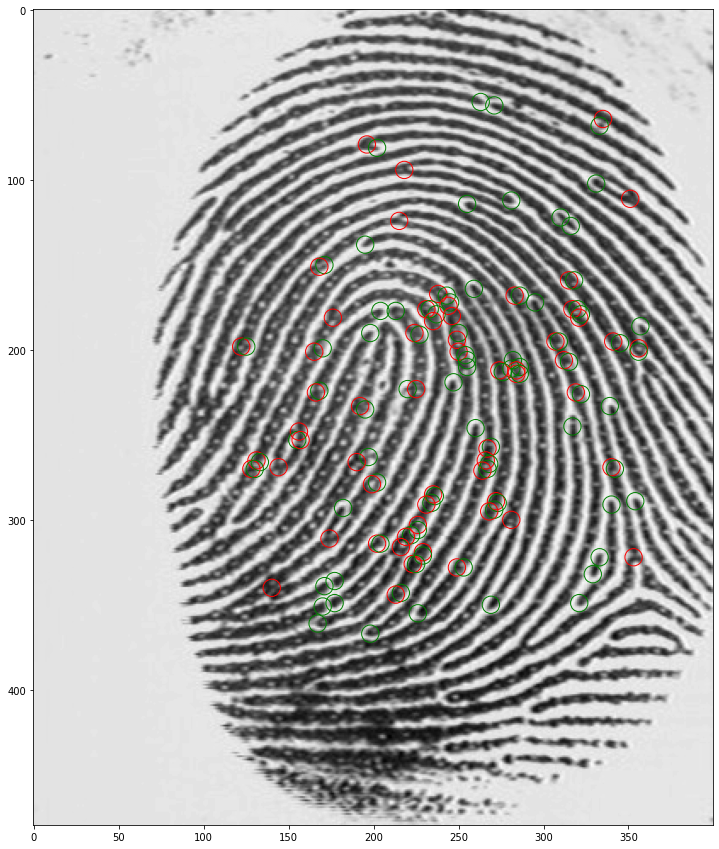

In [14]:
count = 0
plt.figure(figsize=(15, 15))

fp_range = fp_5[48:370, 120:360]

for i, row in enumerate(fp_range):
    for j, val in enumerate(row):
        if val == True:
            if sections(i, j, fp_range) == 1:
                # Ridge ending
                plt.scatter(120+j, 48+i, s=300, facecolors='none', edgecolors='g')
            elif sections(i, j, fp_range) == 3:
                # Bifurcation point
                plt.scatter(120+j, 48+i, s=300, facecolors='none', edgecolors='r')

plt.imshow(fp)
plt.savefig('minutiae extraction original')
plt.show()